# Move the Data to Pandas

In [1]:
import sys
sys.path.insert(0, '../../modules')
%pylab inline
from pprint import pprint
from tracking import HoughSpace
from scipy import sparse
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.ticker as mtick
from hits import CyDetHits, CTHHits, CDCHits
import data_tools as dts
import visualizations as viz
from root_numpy import list_branches, list_trees
from collections import OrderedDict

Populating the interactive namespace from numpy and matplotlib


In [2]:
a_file = "/home/five4three2/development/ICEDUST/track-finding-yandex"+\
         "/data/MC4q/8e6_pot/bunch_train_6/root/MC4q_bkg_f5_b6_t-100_2000.root"

In [3]:
all_branches = OrderedDict()
# Get the two hit trees
trees = [tree for tree in list_trees(a_file) if "Hit" in tree]
# Get the branches for each tree
for tree in trees:
    branches = [branch for branch in list_branches(a_file, treename=tree)]
    for filter_br in ["CDCHit.fDetectedTime",
                      "CDCHit.fCharge",
                      "CDCHit.fEventNumber",
                      "CDCHit.fIsSig",
                      'CTHHit.fMCPos.fE',
                      'CTHHit.fCharge',
                      'CTHHit.fEventNumber',
                      'CTHHit.fIsSig']:
        branches = [branch for branch in branches if filter_br not in branch]
    all_branches[tree[:3]] = branches

In [4]:
%%timeit
sample = dts.data_import_file(a_file, signal=False, use_cuts=None, branches=all_branches)

Getting branches
{'CDC': ['CDCHit.fDriftDist',
         'CDCHit.fDriftTime',
         'CDCHit.fTurnID',
         'CDCHit.fMCMom.fX',
         'CDCHit.fMCMom.fY',
         'CDCHit.fMCMom.fZ',
         'CDCHit.fTrack.fTrackID',
         'CDCHit.fTrack.fParentTrackID',
         'CDCHit.fTrack.fPID',
         'CDCHit.fTrack.fTags.fTagMaskPersisted',
         'CDCHit.fTrack.fTagsAsParent.fTagMaskPersisted',
         'CDCHit.fTrack.fTagsAsDaughter.fTagMaskPersisted',
         'CDCHit.fTrack.fStartMomentum.fX',
         'CDCHit.fTrack.fStartMomentum.fY',
         'CDCHit.fTrack.fStartMomentum.fZ',
         'CDCHit.fTrack.fStopMomentum.fX',
         'CDCHit.fTrack.fStopMomentum.fY',
         'CDCHit.fTrack.fStopMomentum.fZ',
         'CDCHit.fTrack.fStartPosGlobal.fP.fX',
         'CDCHit.fTrack.fStartPosGlobal.fP.fY',
         'CDCHit.fTrack.fStartPosGlobal.fP.fZ',
         'CDCHit.fTrack.fStartPosGlobal.fE',
         'CDCHit.fTrack.fStopPosGlobal.fP.fX',
         'CDCHit.fTrack.fStopPosGloba

CDC sample, n_events =  10000
CTH sample, n_events =  10000
1 loop, best of 3: 3min 5s per loop


Getting branches
{'CDC': ['CDCHit.fDriftDist',
         'CDCHit.fDriftTime',
         'CDCHit.fTurnID',
         'CDCHit.fMCMom.fX',
         'CDCHit.fMCMom.fY',
         'CDCHit.fMCMom.fZ',
         'CDCHit.fTrack.fTrackID',
         'CDCHit.fTrack.fParentTrackID',
         'CDCHit.fTrack.fPID',
         'CDCHit.fTrack.fTags.fTagMaskPersisted',
         'CDCHit.fTrack.fTagsAsParent.fTagMaskPersisted',
         'CDCHit.fTrack.fTagsAsDaughter.fTagMaskPersisted',
         'CDCHit.fTrack.fStartMomentum.fX',
         'CDCHit.fTrack.fStartMomentum.fY',
         'CDCHit.fTrack.fStartMomentum.fZ',
         'CDCHit.fTrack.fStopMomentum.fX',
         'CDCHit.fTrack.fStopMomentum.fY',
         'CDCHit.fTrack.fStopMomentum.fZ',
         'CDCHit.fTrack.fStartPosGlobal.fP.fX',
         'CDCHit.fTrack.fStartPosGlobal.fP.fY',
         'CDCHit.fTrack.fStartPosGlobal.fP.fZ',
         'CDCHit.fTrack.fStartPosGlobal.fE',
         'CDCHit.fTrack.fStopPosGlobal.fP.fX',
         'CDCHit.fTrack.fStopPosGloba

(array([  5.73000000e+02,   1.94300000e+03,   1.60556000e+05,
          1.70336500e+06,   1.38137630e+07,   2.23489300e+06,
          1.38755000e+05,   2.20200000e+03,   2.20000000e+01,
          2.00000000e+00]),
 array([-836.21942139, -655.28452148, -474.34962158, -293.41472168,
        -112.47982178,   68.45507812,  249.38997803,  430.32487793,
         611.25977783,  792.19467773,  973.12957764]),
 <a list of 10 Patch objects>)

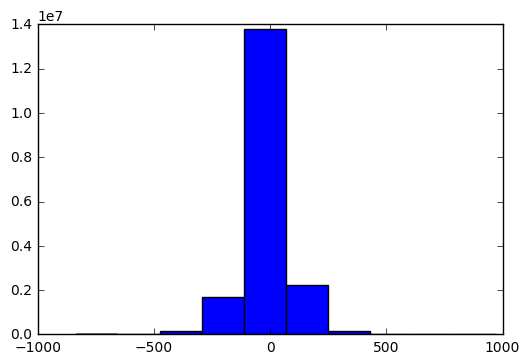

In [5]:

sample = dts.data_import_file(a_file, signal=False, use_cuts=None, branches=all_branches)
MB = 1024*1024
print("Size %d MB" % (sample.cdc.data.nbytes/MB))
print("Size %d MB" % (sample.cth.data.nbytes/MB))

pprint({item for item in sample.cth.data.dtype.fields.items()})
plt.hist(sample.cdc.get_events()["CDCHit.fTrack.fStartMomentum.fX"])

In [6]:
import sys

# These are the usual ipython objects, including this one you are creating
ipython_vars = ['In', 'Out', 'exit', 'quit', 'get_ipython', 'ipython_vars']

# Get a sorted list of the objects and their sizes
#8.1 GB, 2.6 GB